## Nadaraya-Watson for regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate synthetic dataset

In [21]:
# Generate sinusoidal data
np.random.seed(200)
x = np.random.uniform(low=-10, high=10, size=50)
x = np.sort(x)

# Generate t, with random Gaussian noise
t = np.sin(x/1.5)
e = np.random.normal(size=t.shape[0], scale=0.1)
t = t + e

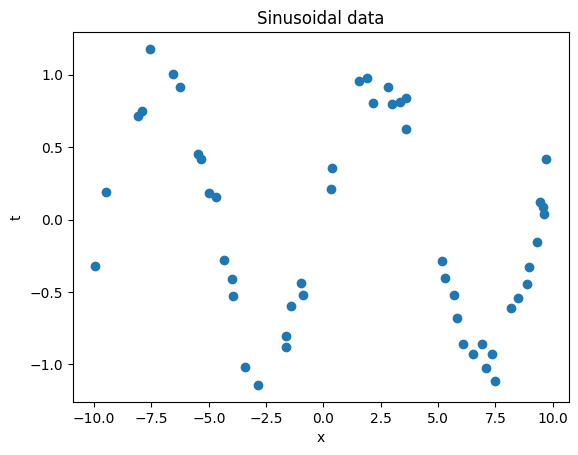

In [22]:
# Plot x and t
plt.scatter(x, t)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Sinusoidal data')
plt.show()

## Nadaraya-Watson model

In [23]:
def kernel_function(X, x, sigma_squared):
    """
    Calculate the kernel function
    :param X: train features
    :param x: test point
    :param sigma_squared: variance of Gaussian density function
    :return: value of kernel function k(x, x_n)
    """
    # Calculate g(x, x_n)
    gs = np.exp(-0.5 * ((x - X) ** 2) / sigma_squared)
    # Calculate k(x, x_n)
    return gs / np.sum(gs)


def predict(X, t, X_test, sigma_squared):
    """
    Prediction from Nadaraya-Watson model
    :param X: train features
    :param t: train labels
    :param X_test: test points
    :param sigma_squared: variance of Gaussian density function
    :return: the conditionals mean and variances t | x
    """
    # Mean and variance
    means = []
    variances = []
    
    # Calculate the mean and variance
    for x_test in X_test:
        # Calculate the weight
        ks = kernel_function(X, x_test, sigma_squared=sigma_squared)
        
        # Calculate the mean
        mean = np.dot(ks, t)
        
        # Calculate the variance
        var = sigma_squared - mean ** 2 + np.dot(ks, t ** 2)
        
        # Append to result
        means.append(mean)
        variances.append(var)
        
    return np.array(means), np.array(variances)

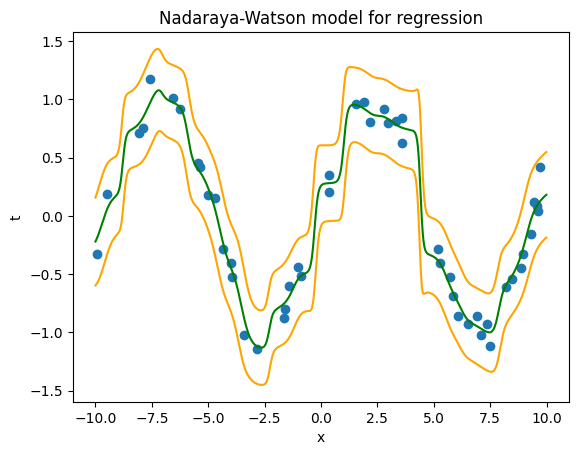

In [31]:
# Generate test points
X_test = np.arange(-10, 10, 0.01)

# Get the mean and variance of prediction
means, variances = predict(x, t, X_test, sigma_squared=0.1)
standard_deviation = np.sqrt(variances)

# Draw the mean and variances
lower_bound = means - standard_deviation
upper_bound = means + standard_deviation

# Plot the lines and points
plt.plot(X_test, means, color='green')
plt.plot(X_test, lower_bound, color='orange')
plt.plot(X_test, upper_bound, color='orange')
plt.scatter(x, t)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Nadaraya-Watson model for regression')
plt.savefig('figures/nadaraya.png')
plt.show()